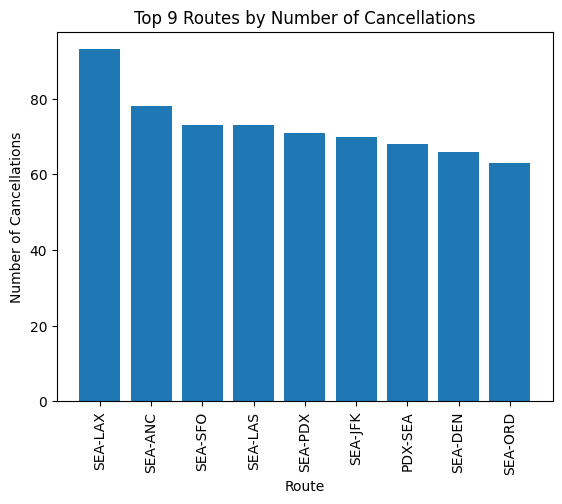

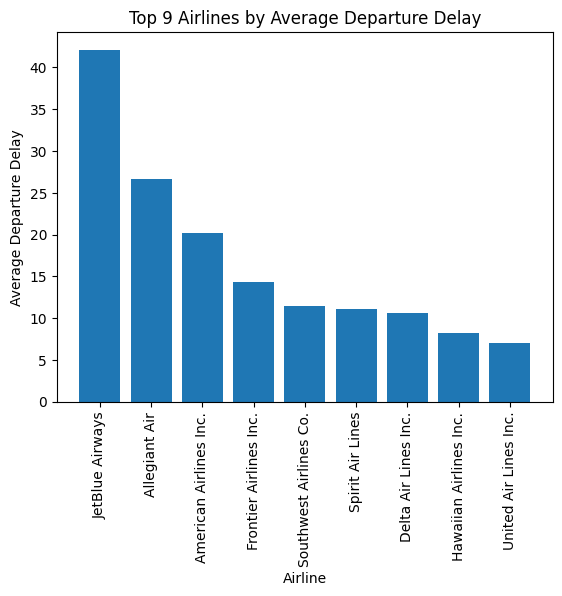

avg_dep_delay    True
dtype: bool


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

flights_data = pd.read_csv("flights2022.csv")
weather_data = pd.read_csv("flights_weather2022.csv")

flights_data["route"] = flights_data["origin"] + "-" + flights_data["dest"]

routes_delays_cancels = flights_data.groupby("route").agg(
    average_dep_delay=("dep_delay", "mean"),
    cancellations_count=("dep_time", lambda times: times.isna().sum())
).reset_index()

top9_route_cancels_bar, ax1 = plt.subplots()
ax1.bar(routes_delays_cancels.sort_values(by="cancellations_count", ascending=False).head(9)["route"],
        routes_delays_cancels.sort_values(by="cancellations_count", ascending=False).head(9)["cancellations_count"])
ax1.set_xlabel("Route")
ax1.set_ylabel("Number of Cancellations")
ax1.set_title("Top 9 Routes by Number of Cancellations")
ax1.set_xticks(range(9))
ax1.set_xticklabels(routes_delays_cancels.sort_values(by="cancellations_count", ascending=False).head(9)["route"], rotation=90)
plt.show()

airlines_delays_cancels = flights_data.groupby("airline").agg(
    avg_dep_delay=("dep_delay", "mean"),
    cancellations_total=("dep_time", lambda times: times.isna().sum())
).reset_index()

top9_airline_delays_bar, ax2 = plt.subplots()
ax2.bar(airlines_delays_cancels.sort_values(by="avg_dep_delay", ascending=False).head(9)["airline"],
        airlines_delays_cancels.sort_values(by="avg_dep_delay", ascending=False).head(9)["avg_dep_delay"])
ax2.set_xlabel("Airline")
ax2.set_ylabel("Average Departure Delay")
ax2.set_title("Top 9 Airlines by Average Departure Delay")
ax2.set_xticks(range(9))
ax2.set_xticklabels(airlines_delays_cancels.sort_values(by="avg_dep_delay", ascending=False).head(9)["airline"], rotation=90)
plt.show()

weather_data["wind_condition"] = weather_data["wind_gust"].apply(
    lambda gust: "10mph or more" if gust >= 10 else "Less than 10mph"
)
wind_impact = weather_data.groupby(["wind_condition", "origin"]).agg(
    avg_dep_delay=("dep_delay", "mean")
)

sea_pdx_impact = wind_impact.loc[(slice(None), ["SEA", "PDX"]), :]
wind_response = sea_pdx_impact.loc["10mph or more"].mean() > sea_pdx_impact.loc["Less than 10mph"].mean()
print(wind_response)
